In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import mplcursors
import seaborn as sns
import math
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [2]:
covid_test_dataset_original = pd.read_csv('dataset/covid19cases_test_012622.csv')
covid_test_dataset = covid_test_dataset_original.copy()
covid_test_dataset.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [3]:
covid_test_dataset['date'] = pd.to_datetime(covid_test_dataset["date"]).dt.strftime('%Y-%m-%d')

In [4]:
covid_test_dataset.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [5]:
recent_date_end = covid_test_dataset['date'][len(covid_test_dataset['date'].values)-2]

recent_date_start = (datetime.strptime(recent_date_end, "%Y-%m-%d") -timedelta(days=7)).strftime("%Y-%m-%d")

In [6]:
# There are 60 unique counties with "California" exclude in the datatset
len(covid_test_dataset['area'].unique())

61

In [7]:
covid_dataset_county = covid_test_dataset.copy()
covid_dataset_county = covid_test_dataset[covid_test_dataset['area_type']=='County']
covid_dataset_county.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [8]:
covid_dataset_newly_updated = covid_dataset_county.copy()
covid_dataset_newly_updated = covid_dataset_county[covid_dataset_county['date']==recent_date_end]
covid_dataset_newly_updated.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
724,2022-01-25,Alameda,County,1685886.0,0.0,219792.0,0.0,1586.0,NaN,5442788,NaN,269426,3501.0,219753.0,8.0,1589.0,19870.0
1450,2022-01-25,Alpine,County,1117.0,0.0,122.0,0.0,0.0,NaN,2816,NaN,77,2.0,122.0,0.0,0.0,4.0
2176,2022-01-25,Amador,County,38531.0,0.0,7353.0,0.0,73.0,NaN,192554,NaN,8689,186.0,7352.0,0.0,73.0,446.0
2902,2022-01-25,Butte,County,217769.0,0.0,28889.0,0.0,350.0,NaN,403531,NaN,32050,280.0,28887.0,1.0,351.0,1097.0
3628,2022-01-25,Calaveras,County,44289.0,0.0,6267.0,0.0,95.0,NaN,87578,NaN,7432,94.0,6266.0,0.0,95.0,310.0


In [9]:
covid_dataset_v1 = {'Area':covid_dataset_county.groupby(['area'])['cases'].sum().index,
                 'Total_Cases':covid_dataset_county.groupby(['area'])['cases'].sum().values,
                 'Total_Deaths':covid_dataset_county.groupby(['area'])['deaths'].sum().values,
                 'Newly_Reported_Cases':covid_dataset_newly_updated.groupby(['area'])['reported_cases'].sum().values,
                 'Newly_Reported_Deaths':covid_dataset_newly_updated.groupby(['area'])['reported_deaths'].sum().values,
                 'Population': covid_dataset_newly_updated['population'].values
                }
covid_dataset_v1_dataset = pd.DataFrame(covid_dataset_v1)

In [10]:
covid_dataset_v1_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population
0,Alameda,219804.0,1589.0,3501.0,8.0,1685886.0
1,Alpine,122.0,0.0,2.0,0.0,1117.0
2,Amador,7355.0,73.0,186.0,0.0,38531.0
3,Butte,28890.0,351.0,280.0,1.0,217769.0
4,Calaveras,6267.0,95.0,94.0,0.0,44289.0


## Total Cases / Deaths

In [11]:
total_cases_dataset_rank = covid_dataset_v1_dataset.sort_values("Total_Cases", ascending=False)
total_deaths_dataset_rank = covid_dataset_v1_dataset.sort_values("Total_Deaths", ascending=False)

Text(0.5, 1.0, 'Total Cases')

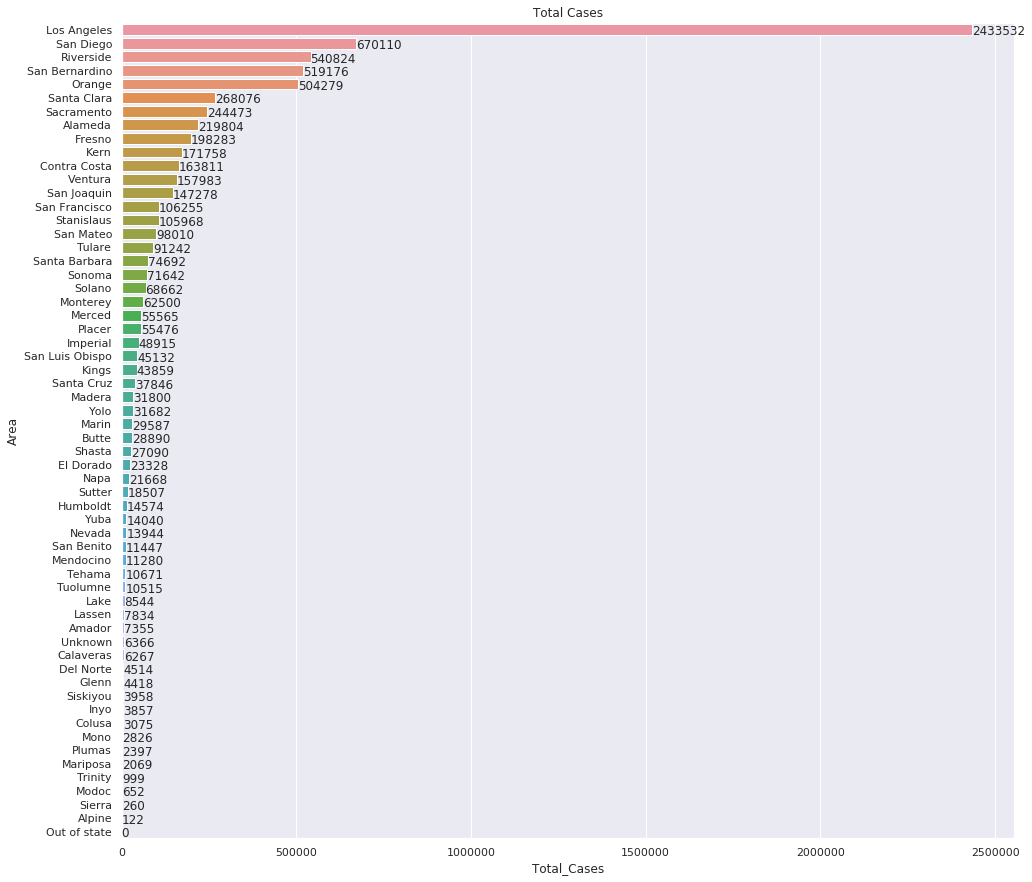

In [12]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =total_cases_dataset_rank["Total_Cases"], y=total_cases_dataset_rank["Area"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Total Cases")

Text(0.5, 1.0, 'Total Deaths')

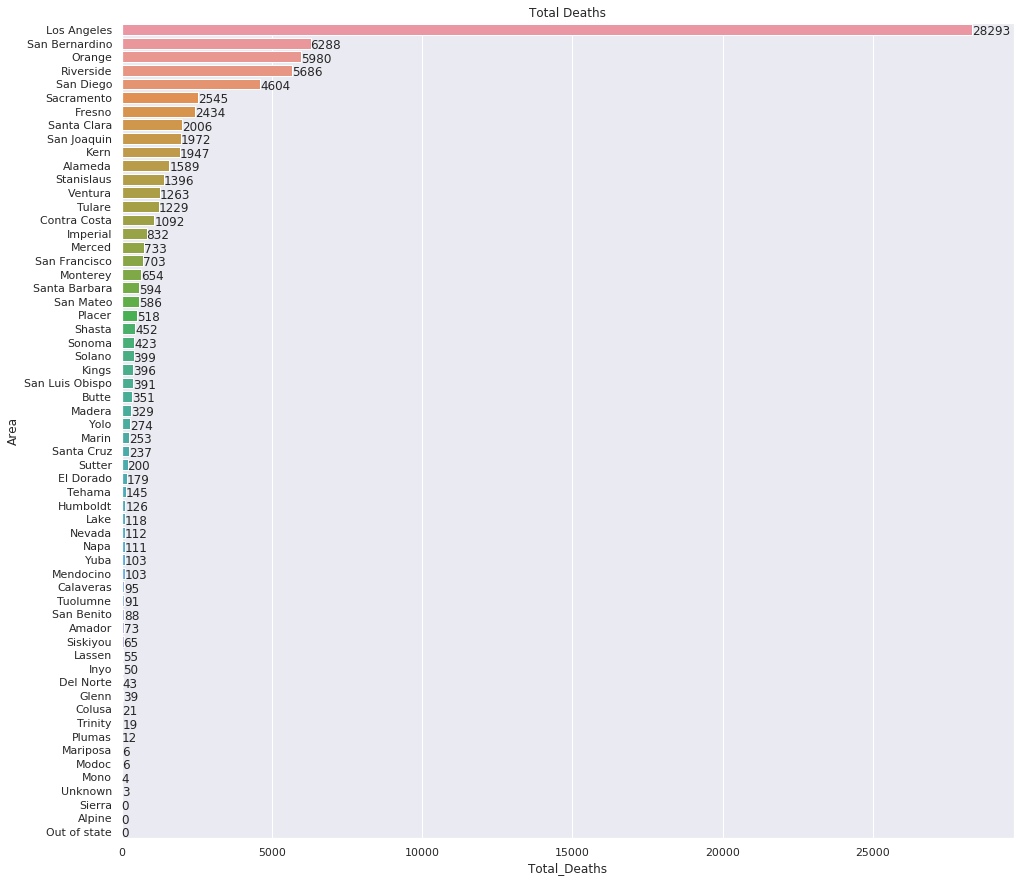

In [13]:
sns.set(rc = {'figure.figsize':(16,15)})
g2 = sns.barplot(x =total_deaths_dataset_rank["Total_Deaths"], y=total_deaths_dataset_rank["Area"])

initialx=0
for p in g2.patches:
    g2.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g2.set_title("Total Deaths")

## Newly Updated Cases/ Deaths

In [14]:
newly_reported_cases_dataset_rank = covid_dataset_v1_dataset.sort_values("Newly_Reported_Cases", ascending=False)
newly_reported_deaths_dataset_rank = covid_dataset_v1_dataset.sort_values("Newly_Reported_Deaths", ascending=False)

Text(0.5, 1.0, 'Newly Cases (Reported in 2022-01-25)')

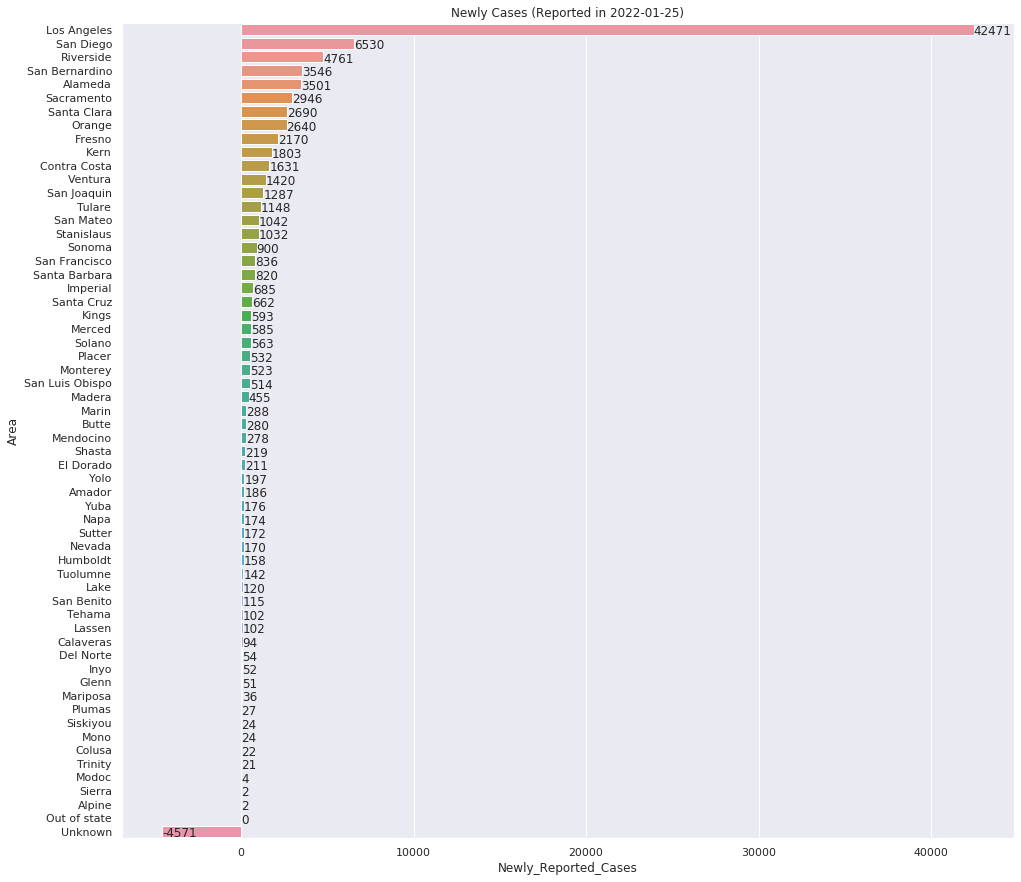

In [15]:
sns.set(rc = {'figure.figsize':(16,15)})
g3 = sns.barplot(x = newly_reported_cases_dataset_rank["Newly_Reported_Cases"],
                 y = newly_reported_cases_dataset_rank["Area"])

initialx=0
for p in g3.patches:
    g3.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g3.set_title("Newly Cases (Reported in %s)"%(recent_date_end))

Text(0.5, 1.0, 'Newly Deaths (Reported in 01/11/2022)')

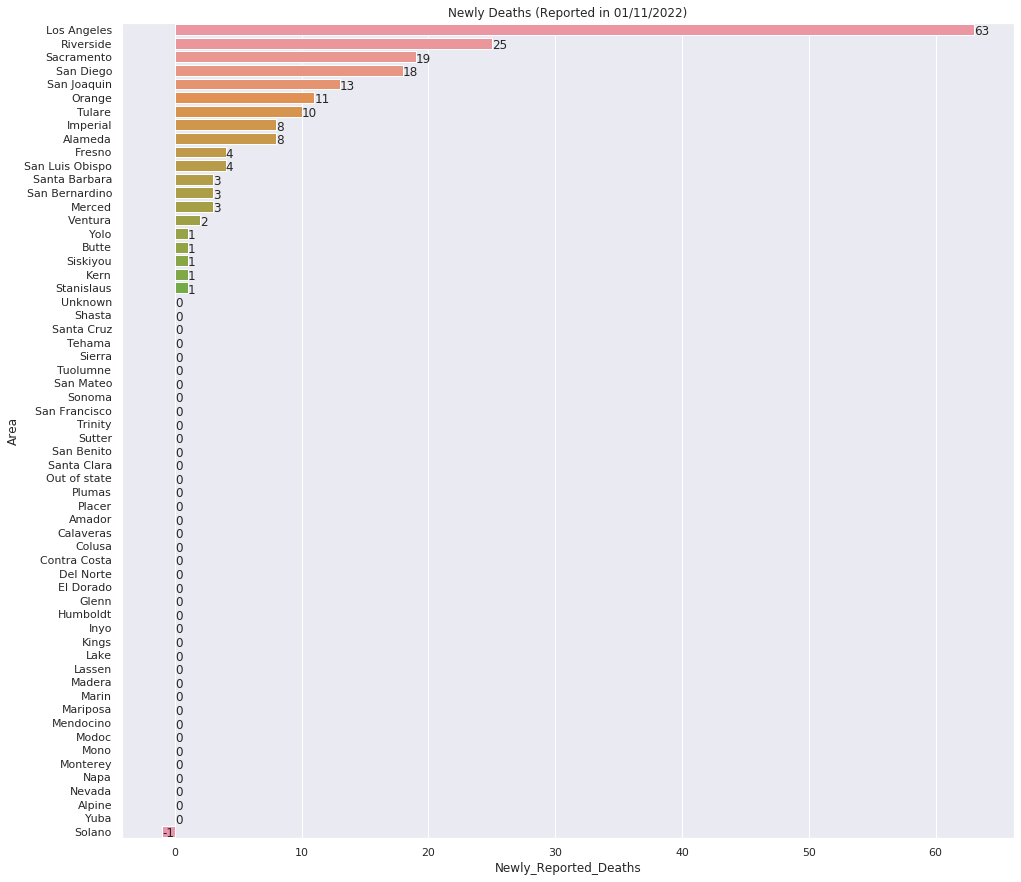

In [16]:
sns.set(rc = {'figure.figsize':(16,15)})
g4 = sns.barplot(x =newly_reported_deaths_dataset_rank["Newly_Reported_Deaths"], 
                 y=newly_reported_deaths_dataset_rank["Area"])

initialx=0
for p in g4.patches:
    g4.text(p.get_width(),initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g4.set_title("Newly Deaths (Reported in 01/11/2022)")

## Cumulative Cases/Deaths per 100k

In [17]:
covid_dataset_v2_dataset = covid_dataset_v1_dataset.copy()

In [18]:
#Total_Cases / Population
covid_dataset_v2_dataset['cumulative_cases'] = (covid_dataset_v2_dataset['Total_Cases'] / covid_dataset_v2_dataset['Population'])
covid_dataset_v2_dataset['cumulative_cases_per_100k'] = round(covid_dataset_v2_dataset['cumulative_cases'] * 100000,2)
cumulative_cases_dataset_rank = covid_dataset_v2_dataset.sort_values("cumulative_cases_per_100k", ascending=False)

In [19]:
#Total_Cases / Population
covid_dataset_v2_dataset['cumulative_deaths'] = (covid_dataset_v2_dataset['Total_Deaths'] / covid_dataset_v2_dataset['Population'])
covid_dataset_v2_dataset['cumulative_deaths_per_100k'] = round(covid_dataset_v2_dataset['cumulative_deaths'] * 100000,2)
cumulative_deaths_dataset_rank = covid_dataset_v2_dataset.sort_values("cumulative_deaths_per_100k", ascending=False)

Text(0.5, 1.0, 'Cumulative Cases (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


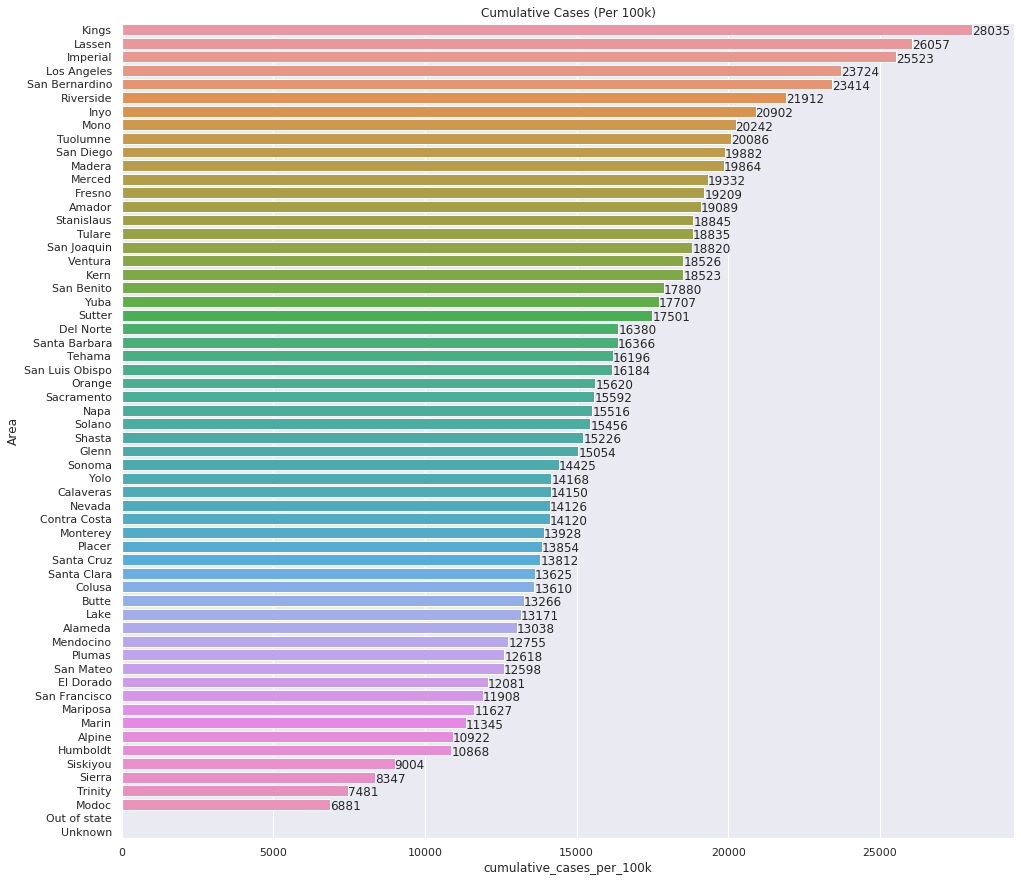

In [20]:
sns.set(rc = {'figure.figsize':(16,15)})
g5 = sns.barplot(x =cumulative_cases_dataset_rank["cumulative_cases_per_100k"],
                 y=cumulative_cases_dataset_rank["Area"])

initialx=0
for p in g5.patches:
    g5.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g5.set_title("Cumulative Cases (Per 100k)")

Text(0.5, 1.0, 'Cumulative Deaths (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


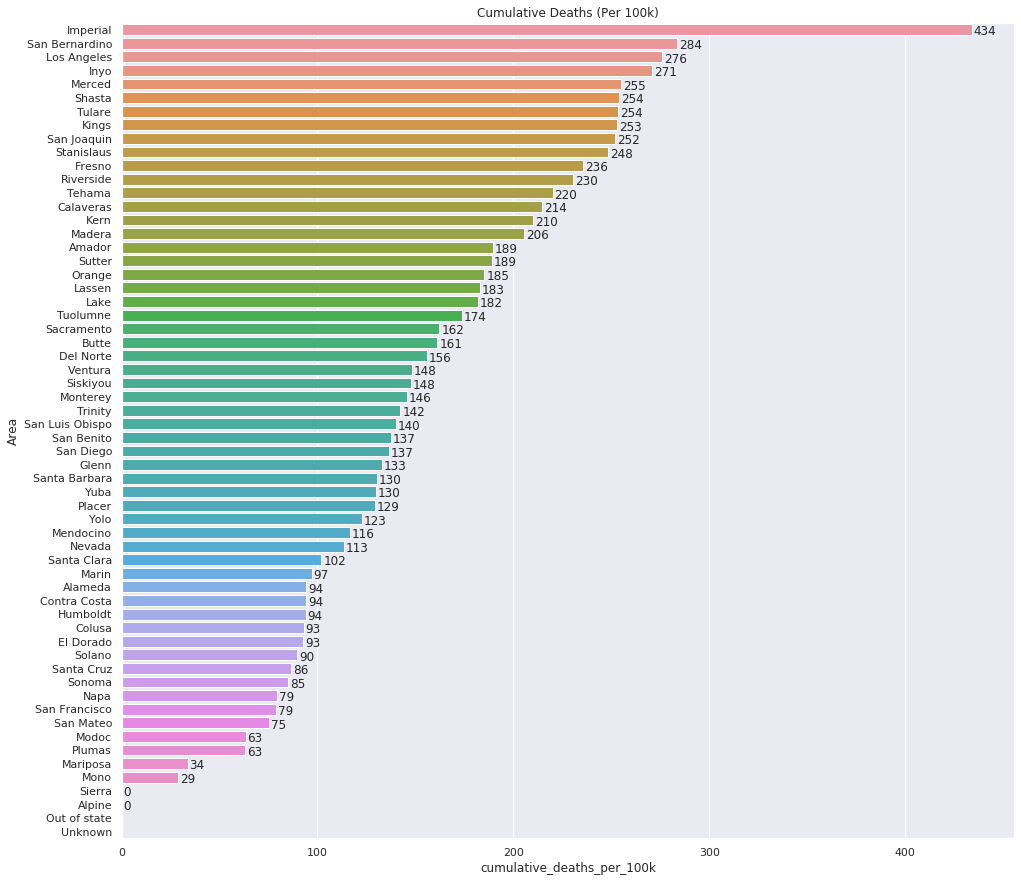

In [21]:
sns.set(rc = {'figure.figsize':(16,15)})
g6 = sns.barplot(x =cumulative_deaths_dataset_rank["cumulative_deaths_per_100k"],
                 y=cumulative_deaths_dataset_rank["Area"])

initialx=0
for p in g6.patches:
    g6.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g6.set_title("Cumulative Deaths (Per 100k)")

In [22]:
covid_dataset_v3_dataset = covid_dataset_v2_dataset.copy()
covid_dataset_v3_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population,cumulative_cases,cumulative_cases_per_100k,cumulative_deaths,cumulative_deaths_per_100k
0,Alameda,219804.0,1589.0,3501.0,8.0,1685886.0,0.130379,13037.89,0.000943,94.25
1,Alpine,122.0,0.0,2.0,0.0,1117.0,0.109221,10922.11,0.000000,0.00
2,Amador,7355.0,73.0,186.0,0.0,38531.0,0.190885,19088.53,0.001895,189.46
3,Butte,28890.0,351.0,280.0,1.0,217769.0,0.132664,13266.35,0.001612,161.18
4,Calaveras,6267.0,95.0,94.0,0.0,44289.0,0.141502,14150.24,0.002145,214.50


In [23]:
covid_dataset_county_v2 = covid_dataset_county.copy()
covid_dataset_county_v2.tail()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
44281,2022-01-22,Yuba,County,79290.0,30.0,13943.0,0.0,78.0,154.0,143081,42.0,16276,0.0,13288.0,0.0,103.0,NaN
44282,2022-01-23,Yuba,County,79290.0,53.0,13996.0,0.0,78.0,167.0,143248,73.0,16349,474.0,13762.0,0.0,103.0,1936.0
44283,2022-01-24,Yuba,County,79290.0,42.0,14038.0,0.0,78.0,102.0,143350,39.0,16388,100.0,13862.0,0.0,103.0,377.0
44284,2022-01-25,Yuba,County,79290.0,0.0,14038.0,0.0,78.0,NaN,143350,NaN,16388,176.0,14038.0,0.0,103.0,488.0
44285,NaN,Yuba,County,79290.0,2.0,14040.0,25.0,103.0,12.0,143362,2.0,16390,0.0,14038.0,0.0,103.0,NaN


## Cases/Deaths per 100k (7-day average)

In [24]:
covid_dataset_county_v2['date']
covid_dataset_county_newly_v2 = covid_dataset_county_v2[(covid_dataset_county_v2['date']>= recent_date_start) & 
                                                        (covid_dataset_county_v2['date']<=recent_date_end)]
covid_dataset_county_newly_v2

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
717,2022-01-18,Alameda,County,1685886.0,4606.0,210294.0,2.0,1582.0,36734.0,5363423,6029.0,257011,2452.0,195728.0,1.0,1566.0,18169.0
718,2022-01-19,Alameda,County,1685886.0,3195.0,213489.0,0.0,1582.0,25380.0,5388803,4105.0,261116,4011.0,199739.0,5.0,1571.0,25636.0
719,2022-01-20,Alameda,County,1685886.0,2783.0,216272.0,1.0,1583.0,23949.0,5412752,3724.0,264840,4188.0,203927.0,4.0,1575.0,29412.0
720,2022-01-21,Alameda,County,1685886.0,1762.0,218034.0,1.0,1584.0,17172.0,5429924,2298.0,267138,0.0,203927.0,0.0,1575.0,NaN
721,2022-01-22,Alameda,County,1685886.0,1078.0,219112.0,0.0,1584.0,7358.0,5437282,1396.0,268534,0.0,203927.0,0.0,1575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44280,2022-01-21,Yuba,County,79290.0,77.0,13913.0,0.0,78.0,387.0,142927,107.0,16234,0.0,13288.0,0.0,103.0,NaN
44281,2022-01-22,Yuba,County,79290.0,30.0,13943.0,0.0,78.0,154.0,143081,42.0,16276,0.0,13288.0,0.0,103.0,NaN
44282,2022-01-23,Yuba,County,79290.0,53.0,13996.0,0.0,78.0,167.0,143248,73.0,16349,474.0,13762.0,0.0,103.0,1936.0
44283,2022-01-24,Yuba,County,79290.0,42.0,14038.0,0.0,78.0,102.0,143350,39.0,16388,100.0,13862.0,0.0,103.0,377.0


In [25]:
covid_dataset_newly = {'Date':covid_dataset_county_newly_v2.groupby(['date'])['cases'].sum().index,
                       'Total_Cases_7days':covid_dataset_county_newly_v2.groupby(['date'])['cases'].sum().values,
                       'Total_Deaths_7days':covid_dataset_county_newly_v2.groupby(['date'])['deaths'].sum().values
                      }
covid_dataset_newly_dataset = pd.DataFrame(covid_dataset_newly)
covid_dataset_newly_dataset

,Date,Total_Cases_7days,Total_Deaths_7days
0,2022-01-18,109611.0,60.0
1,2022-01-19,91743.0,69.0
2,2022-01-20,79157.0,47.0
3,2022-01-21,58395.0,33.0
4,2022-01-22,25773.0,18.0
5,2022-01-23,11261.0,16.0
6,2022-01-24,3468.0,0.0
7,2022-01-25,0.0,0.0


In [26]:
cases_7day = []
deaths_7day = []
window_size =7
for i in range(0, len(covid_dataset_newly_dataset)):
    if i == 0:
        cases_7day.append(covid_dataset_newly_dataset['Total_Cases_7days'][0])
        deaths_7day.append(covid_dataset_newly_dataset['Total_Deaths_7days'][0])
    else:
        cases_window = covid_dataset_newly_dataset['Total_Cases_7days'][0:i+1]
        deaths_window = covid_dataset_newly_dataset['Total_Deaths_7days'][0:i+1]
        cases_window_sum= sum(cases_window)
        deaths_window_sum= sum(deaths_window)
        cases_7day.append(cases_window_sum) 
        deaths_7day.append(deaths_window_sum) 

In [27]:
covid_dataset_newly_dataset['Total_Cases_7days_sum'] = cases_7day
covid_dataset_newly_dataset['Total_Deaths_7days_sum'] = deaths_7day

In [28]:
covid_dataset_newly_dataset.head(3)

,Date,Total_Cases_7days,Total_Deaths_7days,Total_Cases_7days_sum,Total_Deaths_7days_sum
0,2022-01-18,109611.0,60.0,109611.0,60.0
1,2022-01-19,91743.0,69.0,201354.0,129.0
2,2022-01-20,79157.0,47.0,280511.0,176.0


In [29]:
cases_7day_avg = []
deaths_7day_avg = []
for i in range(0, len(covid_dataset_newly_dataset)):
    cases_window_avg = covid_dataset_newly_dataset['Total_Cases_7days_sum'][i] / (i+1)
    deaths_window_avg = covid_dataset_newly_dataset['Total_Deaths_7days_sum'][i] / (i+1)
    cases_7day_avg.append(cases_window_avg)
    deaths_7day_avg.append(deaths_window_avg)

In [30]:
covid_dataset_newly_updated_max_population = covid_dataset_newly_updated.copy()

In [31]:
Cases_per_100k_7_day_average = (sum(cases_7day_avg)/7) / sum(covid_dataset_newly_updated_max_population['population'].dropna())*100000
Deaths_per_100k_7_day_average = (sum(deaths_7day_avg)/7) / sum(covid_dataset_newly_updated_max_population['population'].dropna())*100000

## Cases/Deaths 7 day average (per 100k) by California counties

In [32]:
covid_dataset_county_newly_v3 = covid_dataset_county_newly_v2.copy()
covid_dataset_county_newly_v3.head(6)

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
717,2022-01-18,Alameda,County,1685886.0,4606.0,210294.0,2.0,1582.0,36734.0,5363423,6029.0,257011,2452.0,195728.0,1.0,1566.0,18169.0
718,2022-01-19,Alameda,County,1685886.0,3195.0,213489.0,0.0,1582.0,25380.0,5388803,4105.0,261116,4011.0,199739.0,5.0,1571.0,25636.0
719,2022-01-20,Alameda,County,1685886.0,2783.0,216272.0,1.0,1583.0,23949.0,5412752,3724.0,264840,4188.0,203927.0,4.0,1575.0,29412.0
720,2022-01-21,Alameda,County,1685886.0,1762.0,218034.0,1.0,1584.0,17172.0,5429924,2298.0,267138,0.0,203927.0,0.0,1575.0,NaN
721,2022-01-22,Alameda,County,1685886.0,1078.0,219112.0,0.0,1584.0,7358.0,5437282,1396.0,268534,0.0,203927.0,0.0,1575.0,NaN
722,2022-01-23,Alameda,County,1685886.0,534.0,219646.0,2.0,1586.0,4227.0,5441509,704.0,269238,10076.0,214003.0,8.0,1583.0,80079.0


In [33]:
covid_dataset_county_newly_v3.drop(['area_type', 'cumulative_cases', 'cumulative_deaths','total_tests',
                                    'cumulative_total_tests', 'positive_tests', 'cumulative_positive_tests',
                                    'reported_cases', 'cumulative_reported_cases', 'reported_deaths',
                                    'cumulative_reported_deaths', 'reported_tests'], axis=1, inplace=True)

In [34]:
def extract_cases_7_days_average_per_100k(area_name):
    cases_7day = []
    cases_7day_avg = []
    county_toal_cases = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name].groupby(['date'])['cases'].sum().values
    population = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name]['population'].values[6]
    for i in range(0, len(covid_dataset_newly_dataset)):
        if i == 0:
            cases_7day.append(county_toal_cases[0])
        else:
            cases_window = county_toal_cases[0:i+1]
            cases_window_sum= sum(cases_window)
            cases_7day.append(cases_window_sum) 
    for i in range(0, 7):
        cases_window_avg = cases_7day[i] / (i+1)
        cases_7day_avg.append(cases_window_avg)
    Cases_per_100k_7_day_average = (sum(cases_7day_avg)/7) / population *100000
    return Cases_per_100k_7_day_average

In [35]:
def extract_deaths_7_days_average_per_100k(area_name):
    deaths_7day = []
    deaths_7day_avg = []
    county_toal_deaths = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name].groupby(['date'])['deaths'].sum().values
    population = covid_dataset_county_newly_v3[covid_dataset_county_newly_v2['area']==area_name]['population'].values[6]
    for i in range(0, len(covid_dataset_newly_dataset)):
        if i == 0:
            deaths_7day.append(county_toal_deaths[0])
        else:
            deaths_window = county_toal_deaths[0:i+1]
            deaths_window_sum= sum(deaths_window)
            deaths_7day.append(deaths_window_sum) 
    for i in range(0, 7):
        deaths_window_avg = deaths_7day[i] / (i+1)
        deaths_7day_avg.append(deaths_window_avg)
    Deaths_per_100k_7_day_average = (sum(deaths_7day_avg)/7) / population*100000
    return Deaths_per_100k_7_day_average

In [36]:
covid_dataset_county_newly_v3['area'].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Out of state', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Unknown', 'Ventura', 'Yolo', 'Yuba'],
      dtype=object)

In [37]:
extract_7_days_average_per_100k =[]
for i in covid_dataset_county_newly_v3['area'].unique():
    extract_7_days_average_per_100k.append(
        {
            'Area': i,
            'Average_Cases_7_days': extract_cases_7_days_average_per_100k(i),
            'Average_Deaths_7_days': extract_deaths_7_days_average_per_100k(i),
        }
    )
extract_7_days_average_per_100k_dataset = pd.DataFrame(extract_7_days_average_per_100k)

In [38]:
extract_cases_7_days_average_per_100k_rank = extract_7_days_average_per_100k_dataset.sort_values("Average_Cases_7_days", ascending=False)
extract_deaths_7_days_average_per_100k_rank = extract_7_days_average_per_100k_dataset.sort_values("Average_Deaths_7_days", ascending=False)

Text(0.5, 1.0, 'Cases 7 day average (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


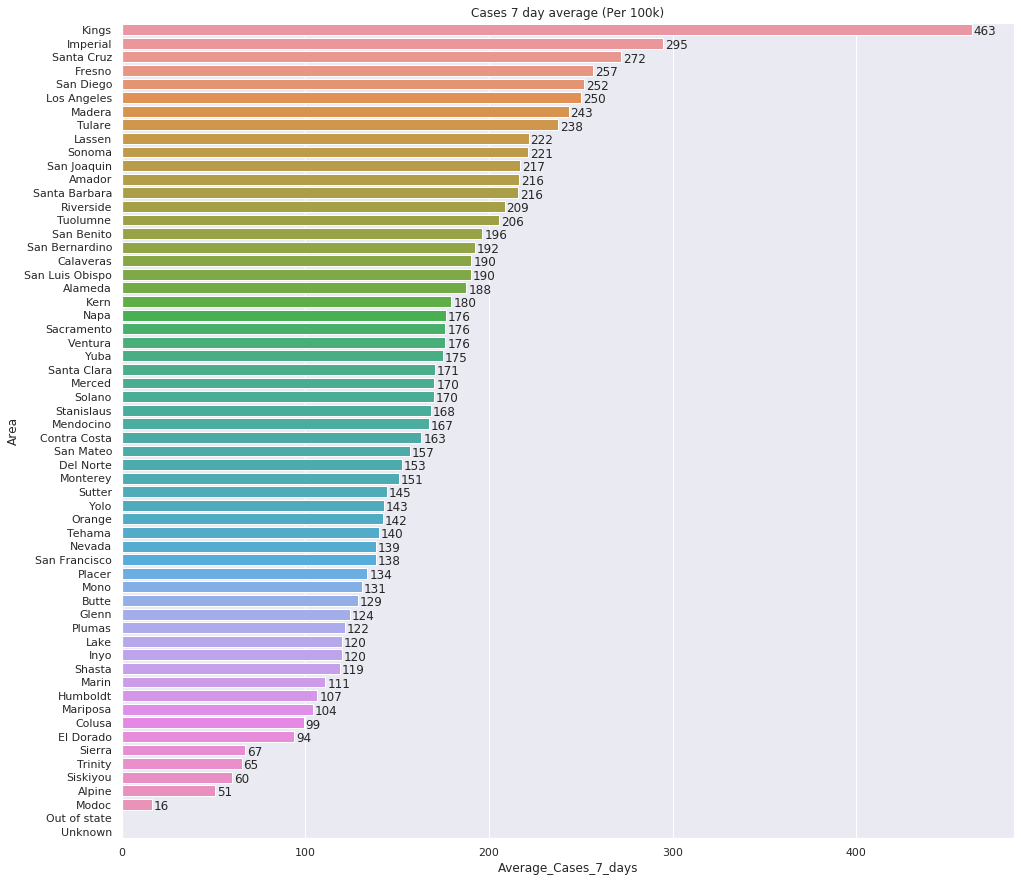

In [39]:
sns.set(rc = {'figure.figsize':(16,15)})
g7 = sns.barplot(x =extract_cases_7_days_average_per_100k_rank["Average_Cases_7_days"],
                 y=extract_cases_7_days_average_per_100k_rank["Area"])

initialx=0
for p in g7.patches:
    g7.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g7.set_title("Cases 7 day average (Per 100k)")

Text(0.5, 1.0, 'Deaths 7 day average (Per 100k)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


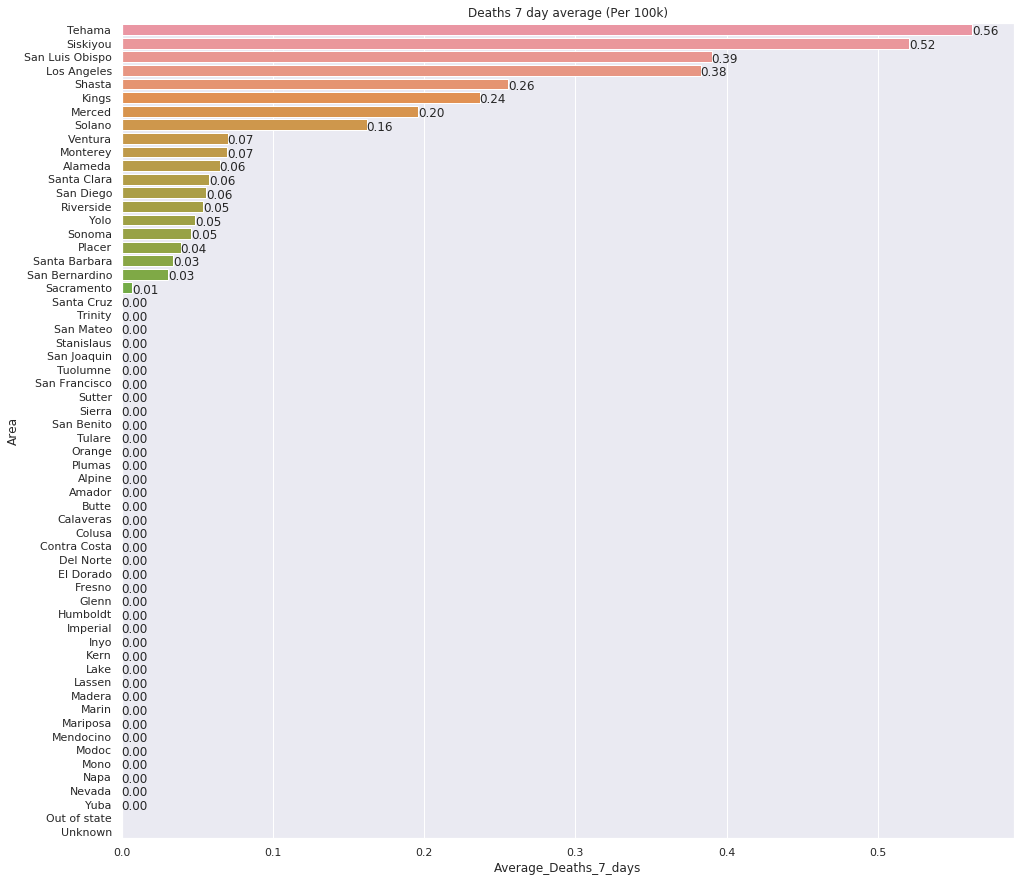

In [40]:
sns.set(rc = {'figure.figsize':(16,15)})
g8 = sns.barplot(x =extract_deaths_7_days_average_per_100k_rank ["Average_Deaths_7_days"],
                 y=extract_deaths_7_days_average_per_100k_rank ["Area"])

initialx=0
for p in g8.patches:
    g8.text(p.get_width(),initialx+p.get_height()/2,"{:1.2f}".format(p.get_width()))
    initialx+=1

g8.set_title("Deaths 7 day average (Per 100k)")

In [41]:
covid_dataset_county_v3 = covid_dataset_county_v2.copy()
covid_dataset_county_v3.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [42]:
covid_dataset_county_v3.tail()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
44281,2022-01-22,Yuba,County,79290.0,30.0,13943.0,0.0,78.0,154.0,143081,42.0,16276,0.0,13288.0,0.0,103.0,NaN
44282,2022-01-23,Yuba,County,79290.0,53.0,13996.0,0.0,78.0,167.0,143248,73.0,16349,474.0,13762.0,0.0,103.0,1936.0
44283,2022-01-24,Yuba,County,79290.0,42.0,14038.0,0.0,78.0,102.0,143350,39.0,16388,100.0,13862.0,0.0,103.0,377.0
44284,2022-01-25,Yuba,County,79290.0,0.0,14038.0,0.0,78.0,NaN,143350,NaN,16388,176.0,14038.0,0.0,103.0,488.0
44285,NaN,Yuba,County,79290.0,2.0,14040.0,25.0,103.0,12.0,143362,2.0,16390,0.0,14038.0,0.0,103.0,NaN


In [43]:
covid_moving_average = {'Date':covid_dataset_county_v3.groupby(['date'])['cases'].sum().index,
                       'Total_Cases_7days':covid_dataset_county_v3.groupby(['date'])['cases'].sum().values,
                       'Total_Deaths_7days':covid_dataset_county_v3.groupby(['date'])['deaths'].sum().values
                      }
covid_moving_average_dataset = pd.DataFrame(covid_moving_average)
covid_moving_average_dataset.head()

,Date,Total_Cases_7days,Total_Deaths_7days
0,2020-02-01,23.0,0.0
1,2020-02-02,7.0,0.0
2,2020-02-03,5.0,0.0
3,2020-02-04,1.0,0.0
4,2020-02-05,3.0,0.0


In [44]:
covid_moving_average_dataset.tail()

,Date,Total_Cases_7days,Total_Deaths_7days
720,2022-01-21,58395.0,33.0
721,2022-01-22,25773.0,18.0
722,2022-01-23,11261.0,16.0
723,2022-01-24,3468.0,0.0
724,2022-01-25,0.0,0.0


In [45]:
len(covid_moving_average_dataset)

725

In [46]:
cases_7day = []
deaths_7day = []
window_size =7
for i in range(0, len(covid_moving_average_dataset)):
    if i == 0:
        cases_7day.append(covid_moving_average_dataset['Total_Cases_7days'][0])
        deaths_7day.append(covid_moving_average_dataset['Total_Deaths_7days'][0])
    else:
        cases_window = covid_moving_average_dataset['Total_Cases_7days'][i:window_size+i]
        deaths_window = covid_moving_average_dataset['Total_Deaths_7days'][i:window_size+i]
        cases_window_sum= sum(cases_window) / window_size
        deaths_window_sum= sum(deaths_window) / window_size
        cases_7day.append(cases_window_sum) 
        deaths_7day.append(deaths_window_sum)
covid_moving_average_dataset['Cases_Moving_average_7days'] = cases_7day
covid_moving_average_dataset['Deaths_Moving_average_7days'] = deaths_7day

In [47]:
covid_moving_average_dataset.head(10)

,Date,Total_Cases_7days,Total_Deaths_7days,Cases_Moving_average_7days,Deaths_Moving_average_7days
0,2020-02-01,23.0,0.0,23.000000,0.000000
1,2020-02-02,7.0,0.0,8.857143,0.142857
2,2020-02-03,5.0,0.0,8.714286,0.142857
3,2020-02-04,1.0,0.0,9.000000,0.142857
4,2020-02-05,3.0,0.0,9.428571,0.142857
5,2020-02-06,7.0,1.0,9.428571,0.142857
6,2020-02-07,32.0,0.0,8.714286,0.000000
7,2020-02-08,7.0,0.0,5.571429,0.000000
8,2020-02-09,6.0,0.0,6.428571,0.000000
9,2020-02-10,7.0,0.0,6.571429,0.000000


In [48]:
covid_moving_average_dataset['Date'] = pd.to_datetime(covid_moving_average_dataset['Date'], format = '%Y-%m-%d')

Text(0.5, 1.0, 'Cases per 100k (7-day average)')

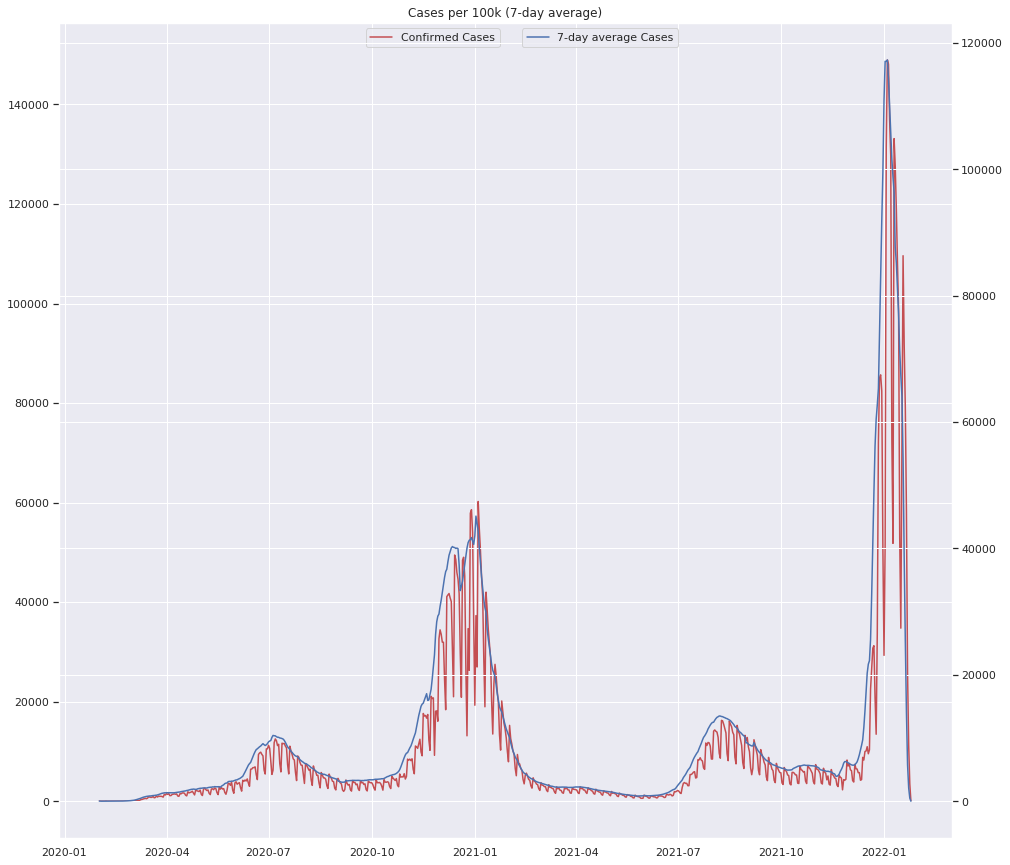

In [49]:
fig9, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Total_Cases_7days'], color='r', label='Confirmed Cases')
ax2.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Cases_Moving_average_7days'], label='7-day average Cases')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax2.legend(bbox_to_anchor=(0.7, 1.0))
ax1.set_title("Cases per 100k (7-day average)")

Text(0.5, 1.0, 'Deaths per 100k (7-day average)')

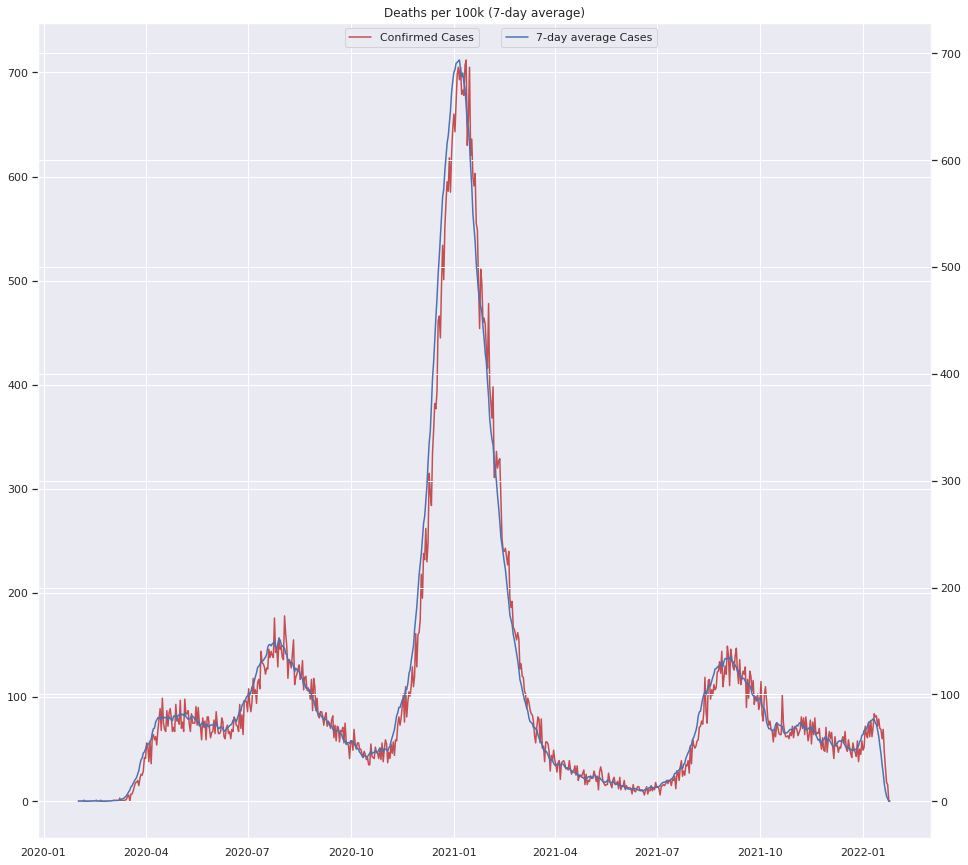

In [50]:
fig10, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Total_Deaths_7days'], color='r', label='Confirmed Cases')
ax2.plot(covid_moving_average_dataset['Date'], covid_moving_average_dataset['Deaths_Moving_average_7days'], label='7-day average Cases')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax2.legend(bbox_to_anchor=(0.7, 1.0))
ax1.set_title("Deaths per 100k (7-day average)")

In [51]:
covid_dataset_v4_dataset = covid_dataset_v1_dataset.copy()
covid_dataset_v4_dataset.head()

,Area,Total_Cases,Total_Deaths,Newly_Reported_Cases,Newly_Reported_Deaths,Population
0,Alameda,219804.0,1589.0,3501.0,8.0,1685886.0
1,Alpine,122.0,0.0,2.0,0.0,1117.0
2,Amador,7355.0,73.0,186.0,0.0,38531.0
3,Butte,28890.0,351.0,280.0,1.0,217769.0
4,Calaveras,6267.0,95.0,94.0,0.0,44289.0


In [52]:
Total_CA_Cases =sum(covid_dataset_v4_dataset['Total_Cases'].values)
RecentCases = sum(covid_dataset_county_v2[covid_dataset_county_v2['date']==recent_date_end]['reported_cases'].dropna().values)
Cases_percent = round((RecentCases/Total_CA_Cases)*100,4)
Total_CA_Deaths =sum(covid_dataset_v4_dataset['Total_Deaths'].values)
RecentDeaths = sum(covid_dataset_county_v2[covid_dataset_county_v2['date']==recent_date_end]['reported_deaths'].dropna().values)
Deaths_percent = round((RecentDeaths/Total_CA_Deaths)*100,4)

In [53]:
print("Cases (Statewide)")
print("Total US Cases : "+str(Total_CA_Cases))
print("Covid19 cases in %s : +"%(recent_date_end) + str(RecentCases) + "(+"+str(Cases_percent)+"%)")
print("Cases per 100k 7-day average (7 period ending "+recent_date_end +"):" + str(round(Cases_per_100k_7_day_average,2)))
print("------------------------------------")
print("Deaths (Statewide)")
print("Total US Deaths : "+str(Total_CA_Deaths))
print("Covid19 deaths in %s : "%(recent_date_end)+ "+"+str(RecentDeaths) + "(+"+str(Deaths_percent)+"%)")
print("Deaths per 100k 7-day average (7 period ending "+recent_date_end +"):" +  str(round(Deaths_per_100k_7_day_average,2)))

Cases (Statewide)
Total US Cases : 7569687.0
Covid19 cases in 2022-01-25 : +87218.0(+1.1522%)
Cases per 100k 7-day average (7 period ending 2022-01-25):222.76
------------------------------------
Deaths (Statewide)
Total US Deaths : 78316.0
Covid19 deaths in 2022-01-25 : +198.0(+0.2528%)
Deaths per 100k 7-day average (7 period ending 2022-01-25):0.14


In [54]:
fig1 = g1.get_figure()
fig2 = g2.get_figure()
fig3 = g3.get_figure()
fig4 = g4.get_figure()
fig5 = g5.get_figure()
fig6 = g6.get_figure()
fig7 = g7.get_figure()
fig8 = g8.get_figure()

In [55]:
fig1.savefig('images/Total_Cases.png')
fig2.savefig('images/Total_Deaths.png')
fig3.savefig('images/Newly_Updated_Cases.png')
fig4.savefig('images/Newly_Updated_Deaths.png')
fig5.savefig('images/Cumulative_Cases_per_100k.png')
fig6.savefig('images/Cumulative_Deaths_per_100k.png')
fig7.savefig('images/Cases_per_100k_7_day_average_by_California counties.png')
fig8.savefig('images/Deaths_per_100k_7_day_average_by_California counties.png')
fig9.savefig('images/Cases_per_100k_7_day_average.png')
fig10.savefig('images/Deaths_per_100k_7_day_average.png')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
